In [45]:
import pandas as pd
import random as r
import datetime
import numpy as np
import gzip
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data


In [2]:
timeval = ['time', 'value']
#files = ['data/heatpump_temperature_1.csv.gz', 'data/heatpump_temperature_2.csv.gz', 'data/heatpump_temperature_3.csv.gz', 'data/heatpump_temperature_4.csv.gz', 'data/heatpump_temperature_5.csv.gz', 'data/heatpump_temperature_6.csv.gz', 'data/heatpump_return_external.csv.gz', 'data/heatpump_hot_gas.csv.gz',  'data/heatpump_probe_in.csv.gz', 'data/heatpump_mk1.csv.gz', 'data/heatpump_starts_compressor1.csv.gz', 'data/heatpump_state.csv.gz', 'data/heatpump_extended_state.csv.gz']
#cols = ['outside', 'return', 'reference_return', 'supply', 'servicewater_reference', 'servicewater', 'return_external', 'hot_gas', 'probe_in', 'mk1', 'starts_compressor1', 'state', 'extended_state']

files = ['data/heatpump_temperature_1.csv.gz', 'data/heatpump_temperature_2.csv.gz', 'data/heatpump_temperature_3.csv.gz', 'data/heatpump_temperature_4.csv.gz', 'data/heatpump_temperature_5.csv.gz', 'data/heatpump_temperature_6.csv.gz', 'data/heatpump_return_external.csv.gz', 'data/heatpump_hot_gas.csv.gz',  'data/heatpump_probe_in.csv.gz', 'data/heatpump_mk1.csv.gz', 'data/heatpump_state.csv.gz', 'data/heatpump_extended_state.csv.gz']
cols = ['outside', 'return', 'reference_return', 'supply', 'servicewater_reference', 'servicewater', 'return_external', 'hot_gas', 'probe_in', 'mk1', 'state', 'extended_state']

state_converter = lambda x: (sys.intern(x.split(":")[0]))
converters = {'data/heatpump_state.csv.gz': state_converter, 'data/heatpump_extended_state.csv.gz': state_converter}
#merged_df = pd.DataFrame({'time': pd.date_range(pd.to_datetime('2016-01-16'), pd.to_datetime('2020-12-25'),freq='1m')})
#merged_df = pd.DataFrame({'time': pd.date_range(pd.to_datetime('2020-12-20'), pd.to_datetime('2020-12-21'),freq='1m')})
merged_df = pd.DataFrame()

for i, file in enumerate(files):
    print(file)
    with gzip.open(file, "rb") as f:
        df = pd.read_csv(f, sep=';', parse_dates=True, index_col=timeval[0], names=timeval, converters={timeval[1]: converters.get(file)})

    df.info(verbose=False)

    #df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S') # see parse_dates = True above
    df['value'] = pd.SparseArray(df['value'].values) # , dtype=df['value'].dtype)
    df.rename(columns={"value": cols[i]}, inplace=True)

    #df.sort_values('time', inplace=True)
    #df.set_index('time', inplace=True)
  
    #df = df[(df.index > '2020-12-10 12:00:00') & (df.index < '2020-12-10 15:00:00')] # Filter

    print(df)

#    if i == 0:
#        merged_df = df
#    else:
#       merged_df = pd.merge_asof(merged_df.sort_values('time'), df, on='time', tolerance=pd.Timedelta("1m"))
    merged_df = merged_df.merge(df, how='outer', left_index=True, right_index=True)
    #print('df_merged memory usage : {}'.format(merged_df.memory_usage()/1000))

#merged_df.set_index('time', inplace=True)


data/heatpump_temperature_1.csv.gz
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2071709 entries, 2016-01-16 14:35:50 to 2020-12-24 23:05:45
Columns: 1 entries, value to value
dtypes: float64(1)
memory usage: 31.6 MB
                     outside
time                        
2016-01-16 14:35:50     13.8
2016-01-16 14:36:00     13.9
2016-01-16 14:36:50     13.8
2016-01-16 14:37:01     13.9
2016-01-16 14:37:51     13.8
...                      ...
2020-12-24 22:57:30     11.9
2020-12-24 23:03:14     12.0
2020-12-24 23:03:24     11.9
2020-12-24 23:05:35     12.0
2020-12-24 23:05:45     11.9

[2071709 rows x 1 columns]
data/heatpump_temperature_2.csv.gz
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1709698 entries, 2016-01-16 14:36:20 to 2020-12-25 01:04:52
Columns: 1 entries, value to value
dtypes: float64(1)
memory usage: 26.1 MB
                     return
time                       
2016-01-16 14:36:20    28.9
2016-01-16 14:36:30    28.8
2016-01-16 14:36:40    28.9
2016-01

In [3]:

display(merged_df)


,outside,return,reference_return,supply,servicewater_reference,servicewater,return_external,hot_gas,probe_in,mk1,state,extended_state
time,,,,,,,,,,,,
2016-01-16 14:35:50,13.8,NaN,NaN,34.0,NaN,NaN,NaN,60.9,3.7,NaN,Heatpump running,heating
2016-01-16 14:36:00,13.9,NaN,NaN,34.1,NaN,38.5,NaN,61.0,NaN,NaN,Heatpump running,heating
2016-01-16 14:36:10,NaN,NaN,NaN,34.2,NaN,38.6,NaN,NaN,NaN,NaN,Heatpump running,heating
2016-01-16 14:36:20,NaN,28.9,NaN,NaN,NaN,38.5,NaN,NaN,NaN,NaN,Heatpump running,heating
2016-01-16 14:36:30,NaN,28.8,NaN,34.3,NaN,38.6,NaN,NaN,NaN,NaN,Heatpump running,heating
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25 01:04:22,NaN,NaN,NaN,20.7,NaN,NaN,NaN,NaN,NaN,22.1,Heatpump stopped,standby
2020-12-25 01:04:32,NaN,21.5,NaN,21.1,NaN,NaN,NaN,NaN,5.3,22.0,Heatpump stopped,standby
2020-12-25 01:04:42,NaN,NaN,NaN,21.3,NaN,NaN,NaN,NaN,NaN,21.9,Heatpump stopped,standby


In [4]:
#merged_df['compressor_heating'] = merged_df['extended_state'].str.contains('compressor heating up') | merged_df['extended_state'].str.contains('unknown')
#merged_df['defrosting'] = merged_df['extended_state'].str.contains('defrosting')
#merged_df['heatpump_running'] = merged_df['state'].str.contains('Heatpump running')
#merged_df['heatpump_heating'] = merged_df['extended_state'].str.contains('heating')
#merged_df['heatpump_servicewater'] = merged_df['extended_state'].str.contains('service water')
dummies_state = pd.get_dummies(merged_df['state'], sparse=True)
dummies_extended_state = pd.get_dummies(merged_df['extended_state'], sparse=True)
merged_df['compressor_heating'] = dummies_extended_state['compressor heating up'] | dummies_extended_state['unknown']
merged_df['heatpump_heating'] = dummies_extended_state['heating']
merged_df['heatpump_servicewater'] = dummies_extended_state['service water']
merged_df['heatpump_running'] = dummies_state['Heatpump running']
merged_df['defrosting'] = dummies_extended_state['defrosting']
merged_df.drop(columns=['state'], inplace=True)
merged_df.drop(columns=['extended_state'], inplace=True)
merged_df

,outside,return,reference_return,supply,servicewater_reference,servicewater,return_external,hot_gas,probe_in,mk1,compressor_heating,heatpump_heating,heatpump_servicewater,heatpump_running,defrosting
time,,,,,,,,,,,,,,,
2016-01-16 14:35:50,13.8,NaN,NaN,34.0,NaN,NaN,NaN,60.9,3.7,NaN,0,1,0,1,0
2016-01-16 14:36:00,13.9,NaN,NaN,34.1,NaN,38.5,NaN,61.0,NaN,NaN,0,1,0,1,0
2016-01-16 14:36:10,NaN,NaN,NaN,34.2,NaN,38.6,NaN,NaN,NaN,NaN,0,1,0,1,0
2016-01-16 14:36:20,NaN,28.9,NaN,NaN,NaN,38.5,NaN,NaN,NaN,NaN,0,1,0,1,0
2016-01-16 14:36:30,NaN,28.8,NaN,34.3,NaN,38.6,NaN,NaN,NaN,NaN,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25 01:04:22,NaN,NaN,NaN,20.7,NaN,NaN,NaN,NaN,NaN,22.1,0,0,0,0,0
2020-12-25 01:04:32,NaN,21.5,NaN,21.1,NaN,NaN,NaN,NaN,5.3,22.0,0,0,0,0,0
2020-12-25 01:04:42,NaN,NaN,NaN,21.3,NaN,NaN,NaN,NaN,NaN,21.9,0,0,0,0,0


In [5]:
display(merged_df.dtypes)
merged_df.info(verbose=False, memory_usage="deep")

outside                   Sparse[float64, nan]
return                    Sparse[float64, nan]
reference_return          Sparse[float64, nan]
supply                    Sparse[float64, nan]
servicewater_reference    Sparse[float64, nan]
servicewater              Sparse[float64, nan]
return_external           Sparse[float64, nan]
hot_gas                   Sparse[float64, nan]
probe_in                  Sparse[float64, nan]
mk1                       Sparse[float64, nan]
compressor_heating            Sparse[uint8, 0]
heatpump_heating              Sparse[uint8, 0]
heatpump_servicewater         Sparse[uint8, 0]
heatpump_running              Sparse[uint8, 0]
defrosting                    Sparse[uint8, 0]
dtype: object

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16466712 entries, 2016-01-16 14:35:50 to 2020-12-25 01:05:02
Columns: 15 entries, outside to defrosting
dtypes: Sparse[float64, nan](10), Sparse[uint8, 0](5)
memory usage: 307.5 MB


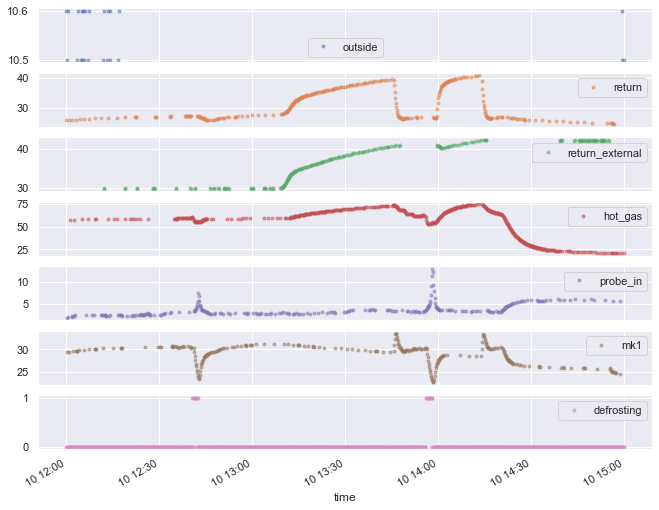

In [6]:

sns.set(rc={'figure.figsize':(20, 8)})

#merged_df[(merged_df.index > '2020-12-10 12:00:00') & (merged_df.index < '2020-12-10 15:00:00')]
df_plot = merged_df['2020-12-10 12:00:00' : '2020-12-10 15:00:00']

cols_plot = ['outside', 'return', 'return_external', 'hot_gas', 'probe_in', 'mk1', 'defrosting']
axes = df_plot[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
#for ax in axes:
#    ax.set_ylabel('Daily Totals (GWh)')


In [7]:
resampled_df = merged_df.sparse.to_dense().ffill().resample('1Min').mean().dropna()
normalized_df=(resampled_df-resampled_df.min())/(resampled_df.max()-resampled_df.min())
display(normalized_df)
normalized_df.info(verbose=False, memory_usage="deep")
display(resampled_df)
resampled_df.info(verbose=False, memory_usage="deep")

,outside,return,reference_return,supply,servicewater_reference,servicewater,return_external,hot_gas,probe_in,mk1,compressor_heating,heatpump_heating,heatpump_servicewater,heatpump_running,defrosting
time,,,,,,,,,,,,,,,
2016-01-17 15:00:00,0.410628,0.307596,0.465385,0.427390,0.670886,0.534325,0.320755,0.664200,0.167159,0.439122,0.0,1.000000,0.000000,1.00,0.0
2016-01-17 15:01:00,0.410628,0.307596,0.465385,0.428147,0.670886,0.534325,0.320755,0.664200,0.167159,0.440120,0.0,1.000000,0.000000,1.00,0.0
2016-01-17 15:02:00,0.410628,0.299318,0.077564,0.434579,0.670886,0.534325,0.321653,0.665159,0.167159,0.440120,0.0,0.166667,0.833333,1.00,0.0
2016-01-17 15:03:00,0.410628,0.243322,0.000000,0.483864,0.670886,0.534325,0.331873,0.671251,0.167159,0.437874,0.0,0.000000,0.750000,0.75,0.0
2016-01-17 15:04:00,0.410628,0.232610,0.000000,0.469013,0.632911,0.534325,0.347709,0.673025,0.165517,0.436128,0.0,0.000000,1.000000,1.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25 01:01:00,0.342995,0.093072,0.000000,0.146680,0.620253,0.534325,0.539084,0.115113,0.244007,0.113772,0.0,0.000000,0.000000,0.00,0.0
2020-12-25 01:02:00,0.342995,0.091889,0.000000,0.147004,0.620253,0.534325,0.539084,0.115113,0.242036,0.113772,0.0,0.000000,0.000000,0.00,0.0
2020-12-25 01:03:00,0.342995,0.091402,0.000000,0.146626,0.620253,0.534325,0.539084,0.115113,0.243678,0.113772,0.0,0.000000,0.000000,0.00,0.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2565526 entries, 2016-01-17 15:00:00 to 2020-12-25 01:05:00
Columns: 15 entries, outside to defrosting
dtypes: float64(15)
memory usage: 313.2 MB


,outside,return,reference_return,supply,servicewater_reference,servicewater,return_external,hot_gas,probe_in,mk1,compressor_heating,heatpump_heating,heatpump_servicewater,heatpump_running,defrosting
time,,,,,,,,,,,,,,,
2016-01-17 15:00:00,13.3,28.700000,27.100000,33.950000,45.0,42.3,29.600000,61.200000,1.600000,32.866667,0.0,1.000000,0.000000,1.00,0.0
2016-01-17 15:01:00,13.3,28.700000,27.100000,33.983333,45.0,42.3,29.600000,61.200000,1.600000,32.900000,0.0,1.000000,0.000000,1.00,0.0
2016-01-17 15:02:00,13.3,28.416667,17.016667,34.266667,45.0,42.3,29.633333,61.283333,1.600000,32.900000,0.0,0.166667,0.833333,1.00,0.0
2016-01-17 15:03:00,13.3,26.500000,15.000000,36.437500,45.0,42.3,30.012500,61.812500,1.600000,32.825000,0.0,0.000000,0.750000,0.75,0.0
2016-01-17 15:04:00,13.3,26.133333,15.000000,35.783333,43.5,42.3,30.600000,61.966667,1.516667,32.766667,0.0,0.000000,1.000000,1.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25 01:01:00,11.9,21.357143,15.000000,21.585714,43.0,42.3,37.700000,13.500000,5.500000,22.000000,0.0,0.000000,0.000000,0.00,0.0
2020-12-25 01:02:00,11.9,21.316667,15.000000,21.600000,43.0,42.3,37.700000,13.500000,5.400000,22.000000,0.0,0.000000,0.000000,0.00,0.0
2020-12-25 01:03:00,11.9,21.300000,15.000000,21.583333,43.0,42.3,37.700000,13.500000,5.483333,22.000000,0.0,0.000000,0.000000,0.00,0.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2565526 entries, 2016-01-17 15:00:00 to 2020-12-25 01:05:00
Columns: 15 entries, outside to defrosting
dtypes: float64(15)
memory usage: 313.2 MB


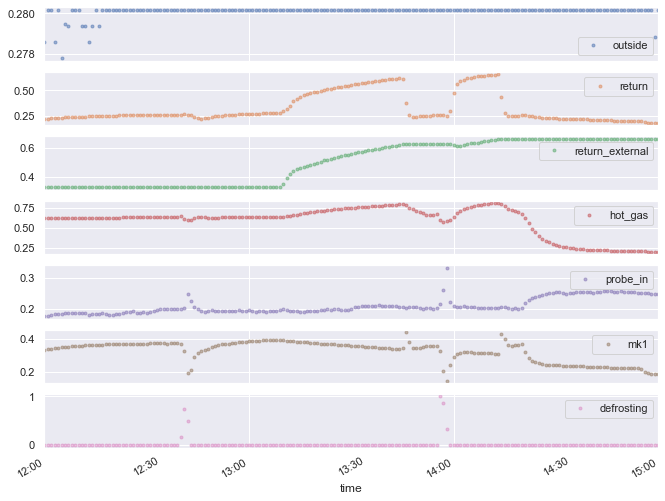

In [8]:

sns.set(rc={'figure.figsize':(20, 8)})

#merged_df[(merged_df.index > '2020-12-10 12:00:00') & (merged_df.index < '2020-12-10 15:00:00')]
df_plot = normalized_df['2020-12-10 12:00:00' : '2020-12-10 15:00:00']
#df_plot = normalized_df['2020-12-10 12:00:00' : '2020-12-10 15:00:00'] # Great visualization of heating before defrosting

cols_plot = ['outside', 'return', 'return_external', 'hot_gas', 'probe_in', 'mk1', 'defrosting']
axes = df_plot[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)

In [9]:
def pp(start, end, n, seed):
    start_u = start.value//10**9
    end_u = end.value//10**9

    # todo: https://numpy.org/doc/stable/reference/random/generator.html?highlight=default_rng#numpy.random.default_rng
    return pd.DatetimeIndex((10**9*np.random.RandomState(seed).randint(start_u, end_u, n, dtype=np.int64)).view('M8[ns]'))


randomstate = np.random.RandomState(42)

def random_datetimes_or_dates(start, end, out_format='datetime', n=10): 

    '''   
    unix timestamp is in ns by default. 
    I divide the unix time value by 10**9 to make it seconds (or 24*60*60*10**9 to make it days).
    The corresponding unit variable is passed to the pd.to_datetime function. 
    Values for the (divide_by, unit) pair to select is defined by the out_format parameter.
    for 1 -> out_format='datetime'
    for 2 -> out_format=anything else
    '''
    (divide_by, unit) = (10**9, 's') if out_format=='datetime' else (24*60*60*10**9, 'D')

    start_u = start.value//divide_by
    end_u = end.value//divide_by

    return pd.to_datetime(randomstate.randint(start_u, end_u, n), unit=unit) 


def overlap_chunks(chunks, start_date, end_date):
    for chunk_df in chunks:
        chunk_start_date = chunk_df.index[0]
        chunk_end_date = chunk_df.index[-1]
        chunk_end_date = chunk_start_date + datetime.timedelta(minutes=30)

        if chunk_start_date < start_date < chunk_end_date:
            return True

        if chunk_start_date < end_date < chunk_end_date:
            return True
    return False


# todo: split_chunks need to be much faster!
def split_chunks(df, min, size):
    min_date = normalized_df.index[0]
    max_date = normalized_df.index[-1]

#    min_date = normalized_df.iloc[0].name
#    max_date = normalized_df.iloc[-1].name
    
    chunks = []
    next_size = size
    while len(chunks) < size:
        dates = random_datetimes_or_dates(min_date, max_date, n=next_size)
        for date in dates:
            end_date = date + datetime.timedelta(minutes=min)

#            if overlap_chunks(chunks, date, end_date):
#                print("!!! Overlapping Date range: {} - {}".format(date, end_date))
#                continue

            chunk_df = df[date : end_date]
            if chunk_df.shape[0] == min:
                print("Date range: {} - {}".format(date, end_date))
                chunks.append(chunk_df)
        print("Chunks: {}".format(len(chunks)))
        next_size = size-len(chunks)
        print("Next size: {}".format(next_size))


#data = normalizd_df[['outside', 'return', 'return_external', 'hot_gas', 'probe_in', 'mk1', 'defrosting']]
## Filter data

# Filter for standard operating hours
# todo: Filter earlier?
#min_date = normalized_df.iloc[:0].index.values
#max_date = normalized_df.iloc[:-1].index.values

data_df = normalized_df[((normalized_df.index.month >= 9) | (normalized_df.index.month <= 4)) & ((normalized_df.index.hour >= 11) & (normalized_df.index.hour < 18))]

#chunks = split_chunks(data_df, 30, 500)

#data_train = chunks[:400]
#data_test = chunks[:-100]




#print(data_df.index.year - min_date.year)
#train_df = data_df[((data_df.index.year - min_date.year) * 365 + (data_df.index.day_of_year - min_date.day_of_year))>2]
#train_df = data_df[((data_df.index.year - min_date.year) * 365) >2]
#train_df
#data_tensor = torch.tensor(data_df.values.astype(np.float32))
#display(data_tensor)


In [63]:
len_seq_min = 120
len_future_min = 5
dist_seq_min = 2
input_features = 3

class HeatpumpDataset(data.Dataset):
    """Heatpump dataset."""

    def __init__(self, df, transform=None):
        """
        Args:
            df (DataFrame): Normalized dataframe with heatpump data; must be chunked in continuous 30min blocks 
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.df = df
        self.transform = transform
        self.samples = []
#        date_list = pd.date_range(df.index[0],df.index[-1]-pd.Timedelta(days=1),freq='d')
        date_list = pd.date_range(self.df.index[0]-pd.Timedelta(seconds=30), self.df.index[-1],freq='{}min'.format(dist_seq_min))

        for date in date_list:
            sample_df = self.df[date : date+pd.Timedelta(minutes=len_seq_min)]
#            sample_df_future = self.df[date : date+pd.Timedelta(minutes=len_seq_min)]
            if (sample_df.shape[0]==len_seq_min):
#                print("Shape: ", sample_df['defrosting'].iloc[len_seq_min - len_future_min : len_seq_min].sum())
#                if (sample_df[sample_df['defrosting'] > 0].shape[0] > 0) or (r.random() > 0.995):
                if (sample_df['defrosting'].iloc[len_seq_min - len_future_min : len_seq_min].sum() > 0) or (r.random() > 0.98):
                    self.samples.append(sample_df)

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        sample_df = self.samples[idx]

#        sample_x = sample_df[['outside', 'return', 'reference_return', 'supply', 'servicewater_reference', 'servicewater', 'return_external', 'hot_gas', 'probe_in', 'mk1', 'compressor_heating', 'heatpump_heating', 'heatpump_servicewater', 'heatpump_running']].iloc[0 : 25].to_numpy(dtype=np.float32) # Size: 14
#        sample_x = sample_df[['return', 'supply', 'return_external', 'hot_gas', 'probe_in', 'compressor_heating', 'heatpump_heating', 'heatpump_servicewater', 'heatpump_running', 'defrosting']].iloc[0 : len_seq_min - 5].to_numpy(dtype=np.float32) # Size: 10
        sample_x = sample_df[['hot_gas', 'probe_in', 'defrosting']].iloc[0 : len_seq_min - len_future_min].to_numpy(dtype=np.float32) # Size: 3
#            sample_y = np.float32(1.0 if sample_df['defrosting'].iloc[len_seq_min - 5 : len_seq_min].mean() > 0 else 0.0)
        if sample_df['defrosting'].iloc[len_seq_min - len_future_min : len_seq_min].sum() > 0:
            sample_y = np.array([1, 0], dtype=np.float32)
        else:
            sample_y = np.array([0, 1], dtype=np.float32)
        #.to_numpy(dtype=np.float32)

        if self.transform:
            sample = self.transform(sample_x, sample_y)

        return sample_x, sample_y


#test_df = data_df['2016-09-11 00:00:00' : '2016-09-11 00:00:00']
#print(test_df.first)
#dataset = HeatpumpDataset(test_df)

#data_df.shape[0]

#display(data_df)

#date_list = pd.date_range(normalized_df.index[0],normalized_df.index[-1]-pd.Timedelta(days=1),freq='d')

#for date in date_list:
#    sub_df = normalized_df[date : date+pd.Timedelta(days=1)-pd.Timedelta(seconds=-1)]
#    print("Check date {}: {}".format(date, sub_df.shape[0]))

#pd.set_option('display.max_rows', 2000)
#test_df = data_df['2016-09-11 10:30:00' : '2016-09-11 11:30:00']
#display(test_df.index[-1].nanosecond)
#pd.set_option('display.max_rows', 20)

In [64]:
dataset = HeatpumpDataset(data_df)
len(dataset)


6472

In [65]:
batch_size = 32

train_size = int( 0.8 * len(dataset) - (0.8 * len(dataset)) % batch_size)
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

print("Training samples: ", len(train_dataset))
print("Testing samples: ", len(test_dataset))
#display(train_dataset[4][0])
#display(train_dataset[4][1])

#print(train_dataset[4][0])

defrost_num = 0
for i in range(len(train_dataset)):
    if train_dataset[i][1][0] == 1.0:
        defrost_num = defrost_num + 1

print("Training samples with defrosting: ", defrost_num, " (", defrost_num/len(train_dataset), ")")



Training samples:  5152
Testing samples:  1320
Training samples with defrosting:  2345  ( 0.45516304347826086 )


DEFROSTING samples!


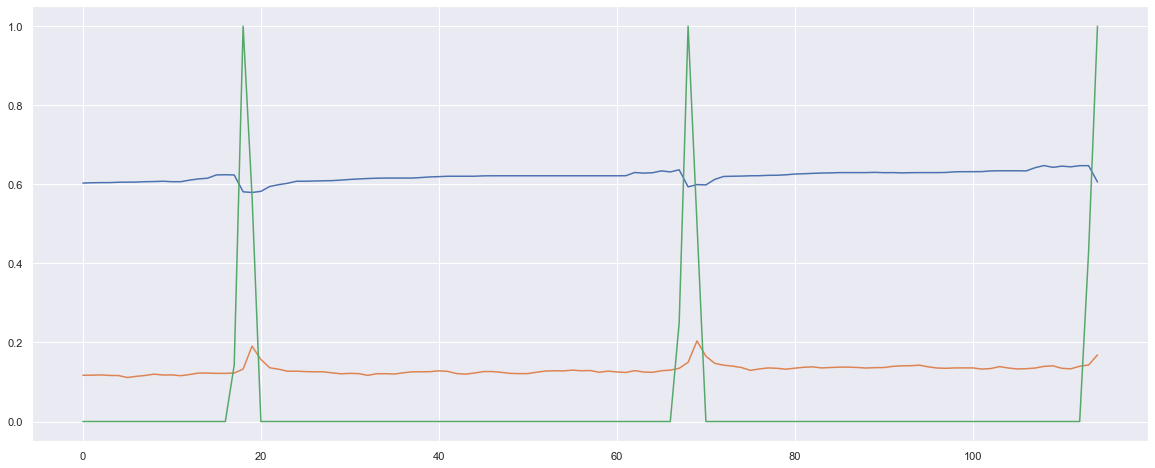

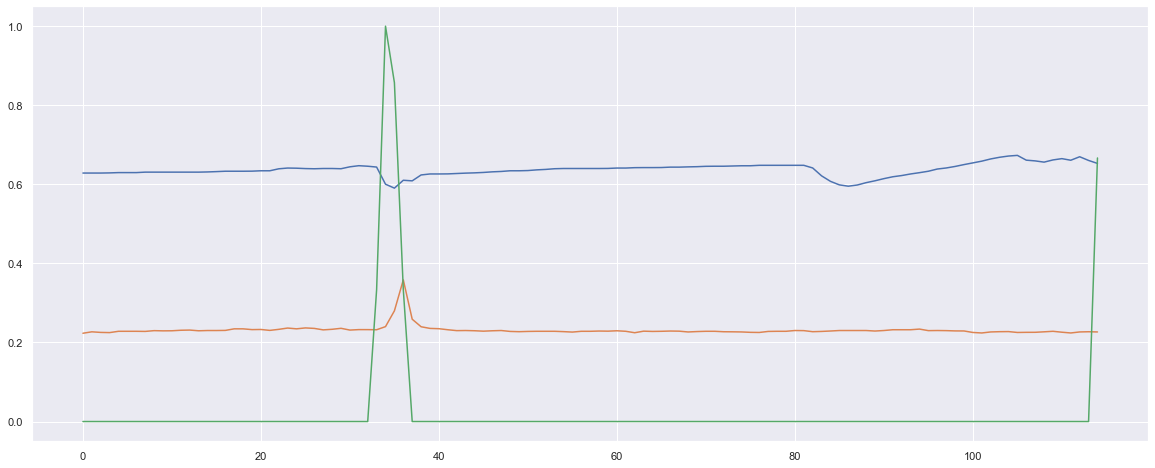

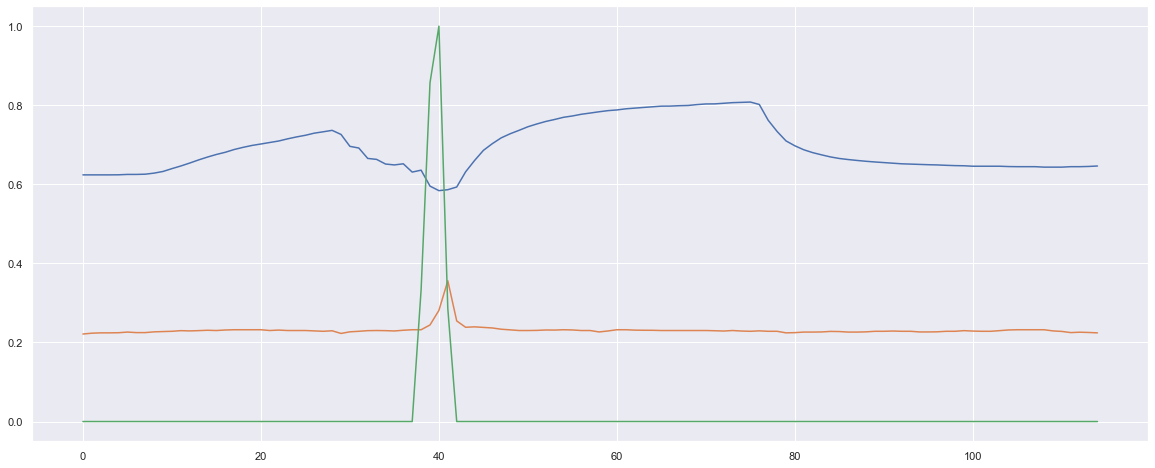

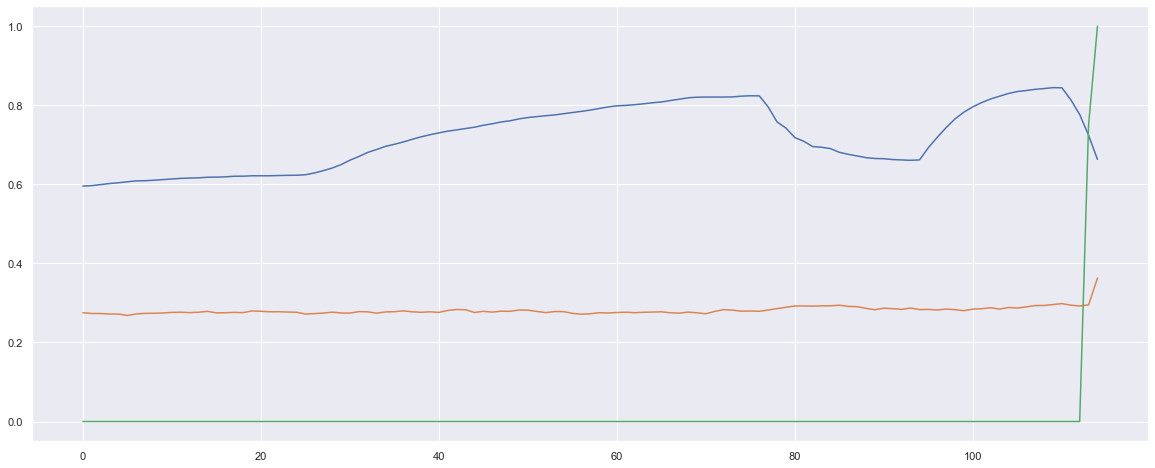

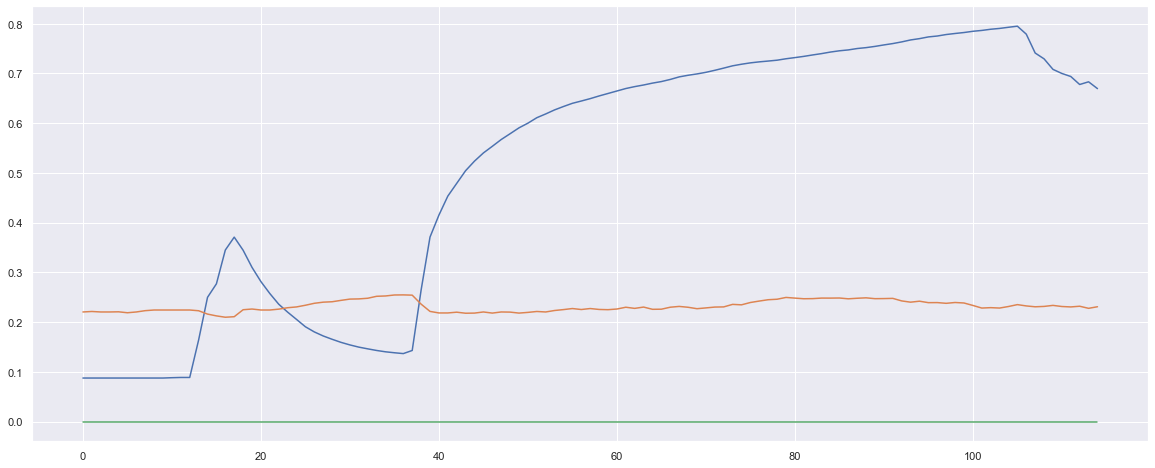

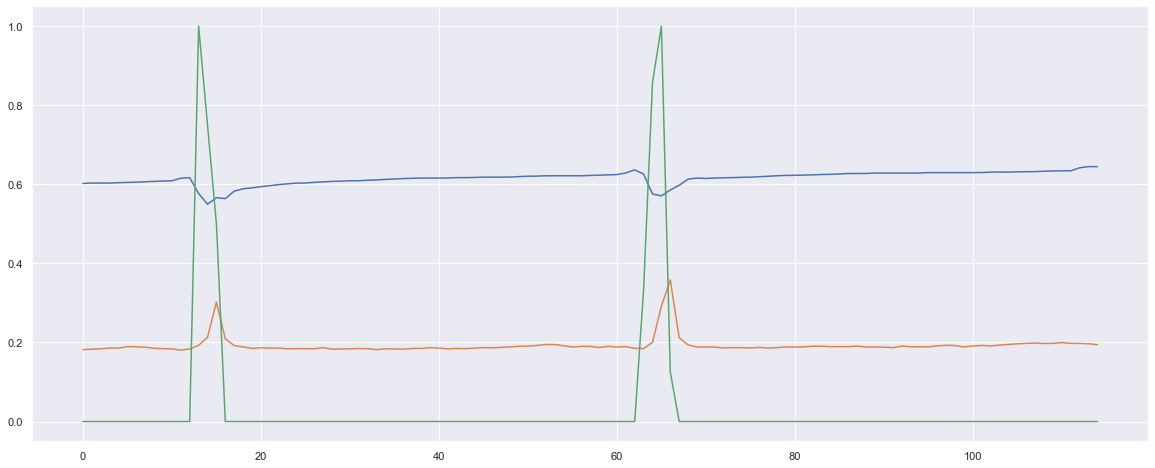

Normal samples!


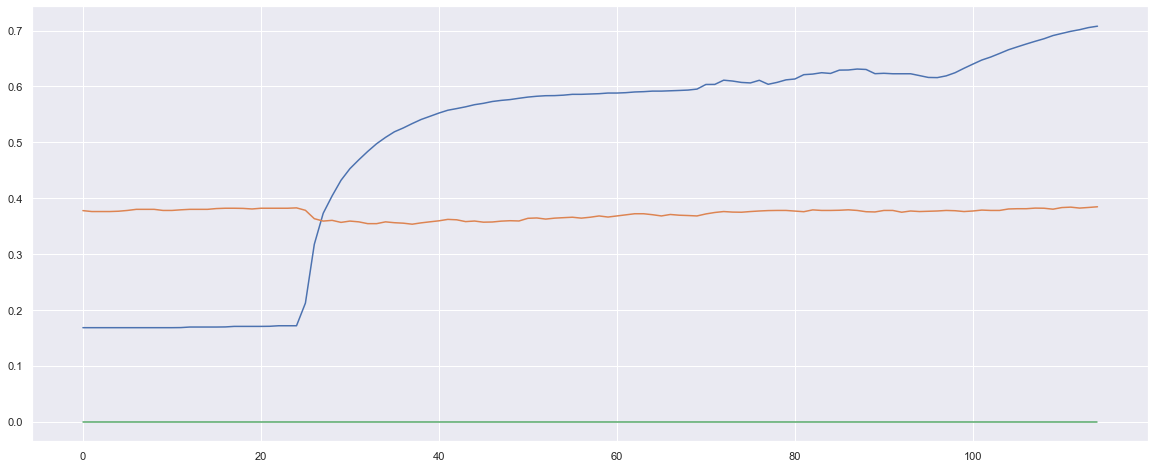

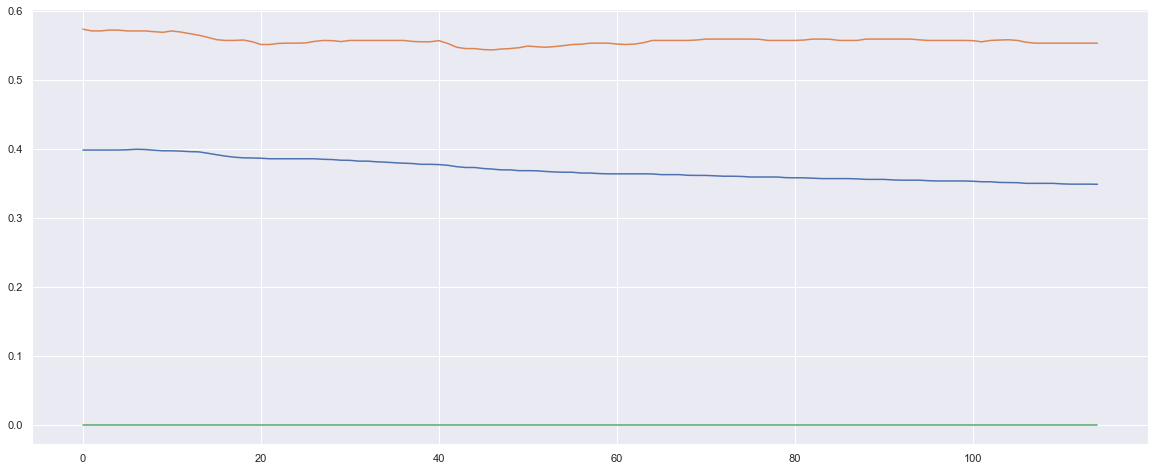

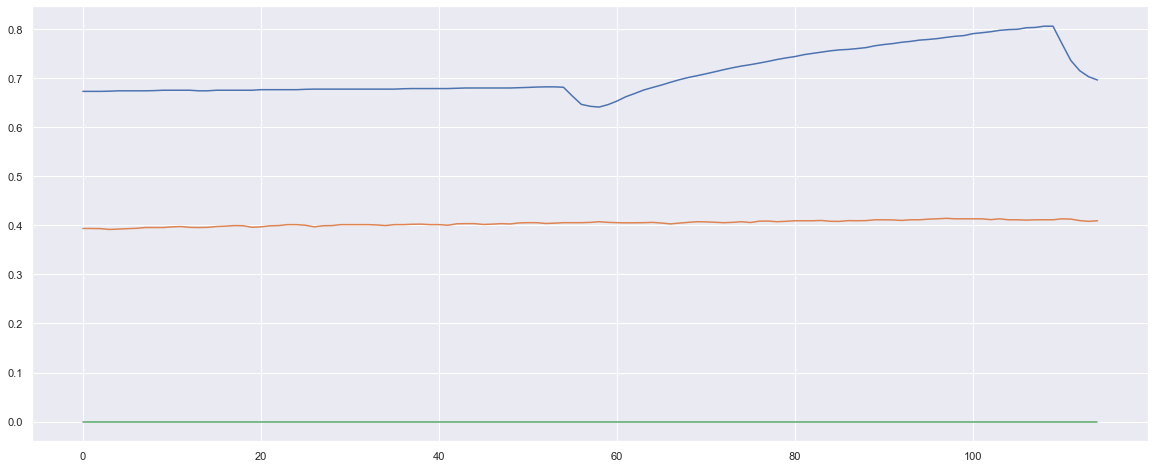

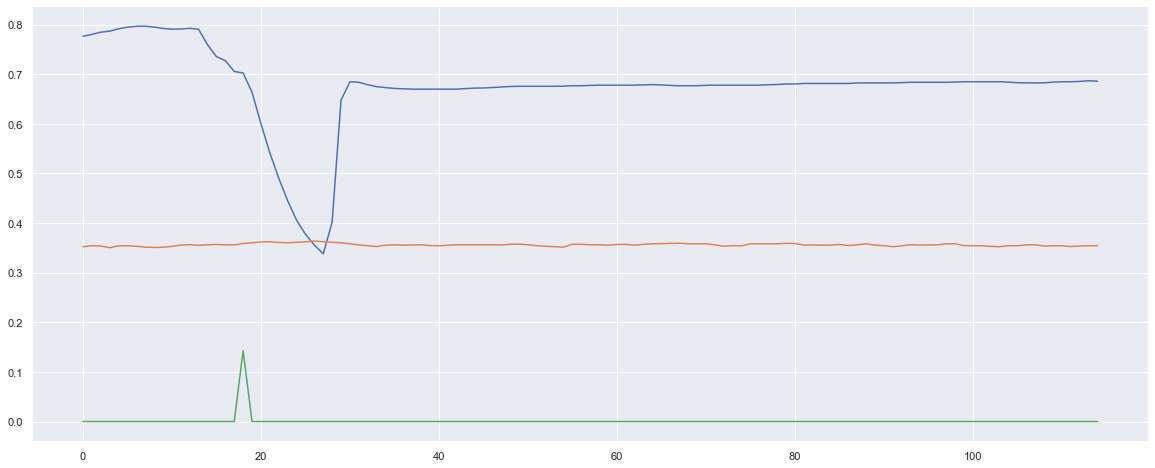

In [74]:

print("DEFROSTING samples!")

for i in range(10):
    sample = train_dataset[i]
    if sample[1][0] == 1.0:
        plt.plot(sample[0])
        plt.show()
    

print("Normal samples!")

for i in range(10):
    sample = train_dataset[i]
    if sample[1][0] == 0.0:
        plt.plot(sample[0])
        plt.show()


In [68]:
train_dataloader = torch.utils.data.DataLoader(train_dataset,
                                             batch_size=32, batch_sampler=None, shuffle=False,
                                             num_workers=0, drop_last=True)

test_dataloader = torch.utils.data.DataLoader(test_dataset,
                                             batch_size=32, batch_sampler=None, shuffle=False,
                                             num_workers=0, drop_last=True)



In [78]:
class DefrostLSTM(nn.Module):

    def __init__(self, input_dim, hidden_dim, batch_size, output_dim=1,
                    num_layers=2):
        super(DefrostLSTM, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.num_layers = num_layers

        # Define the LSTM layer
        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers, dropout = 0.2)

        # Define the output layer
        self.linear = nn.Linear(self.hidden_dim, output_dim)
#        self.m = nn.Sigmoid()
#        self.hidden = self.init_hidden()

#    def init_hidden(self):
#        # This is what we'll initialise our hidden state as
#        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_dim),
#                torch.zeros(self.num_layers, self.batch_size, self.hidden_dim))

    def forward(self, input):
        # Forward pass through LSTM layer
        # shape of lstm_out: [input_size, batch_size, hidden_dim]
        # shape of self.hidden: (a, b), where a and b both 
        # have shape (num_layers, batch_size, hidden_dim).

#        print("input_len: ", len(input))

#        // random hidden layer(s)
#        h_0 = torch.randn(self.num_layers * 1, self.batch_size, self.hidden_dim)
#        c_0 = torch.randn(self.num_layers * 1, self.batch_size, self.hidden_dim)

#        lstm_out, self.hidden = self.lstm(input.reshape(25, -1, self.input_dim), (h_0, c_0))

        lstm_out, self.hidden = self.lstm(input.reshape(len_seq_min - len_future_min, -1, self.input_dim))
        
        # Only take the output from the final timetep
        # Can pass on the entirety of lstm_out to the next layer if it is a seq2seq prediction
        y_pred = self.linear(lstm_out[-1].view(self.batch_size, -1))
#        print("y_pred: ", y_pred)
#        print("y_pred.view(-1): ", y_pred.view(-1))
#        return y_pred.view(-1)
#        y_pred = self.linear(lstm_out[-1].view(self.batch_size, -1))

#        y_pred = self.m(y_pred)
        return y_pred

model = DefrostLSTM(input_dim = input_features, hidden_dim = 200, batch_size = 32, output_dim=2, num_layers=2)


# optimizer , loss
#criterion = torch.nn.MSELoss()
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 1000

#model.init_hidden()

In [79]:
#training loop

train_hist = np.zeros(epochs)
test_hist = np.zeros(epochs)

for i in range(epochs):

    model.train()
    running_loss = 0.0
    for j,sample in enumerate(train_dataloader):
        x_train = sample[0]
        y_train = sample[1]


#        print(x_train)
#        print(sample[:][0])
#        print(len(sample[:][0]))
#        print(sample[:][0].reshape(-1,25,14))
#        y_pred = model(sample[:][0].reshape(-1,25,14)) # .view(-1,25,1)???
        y_pred = model(x_train) # .view(-1,25,1)???
#        print(sample[:][1])
#        print(y_train)
#        print(y_pred)
#        print(y_pred.shape)
#        print(y_pred.unsqueeze(dim=1).shape)

#        loss = criterion(y_pred.unsqueeze(dim=1), y_train)

        optimizer.zero_grad()

        loss = criterion(y_pred, y_train)

        running_loss += loss.item() * x_train.size(0)

#        if (j<3) | (j>(len(dataloader)-3)):
#            print("Sample: ", j, "   Shape: ", x_train.shape, "    BCELOSS: ", loss.item(), " * ", x_train.size(0), "   running_loss: ", running_loss)

        loss.backward()
        optimizer.step()

#        break
    train_hist[i] = running_loss

    with torch.no_grad():
        model.eval()

        running_loss = 0.0
        for j,sample in enumerate(test_dataloader):
            x_test = sample[0]
            y_test = sample[1]

            y_pred = model(x_test)
    
            loss = criterion(y_pred, y_test)

            running_loss += loss.item() * x_test.size(0)

        test_hist[i] = running_loss

    if i%1 == 0:
        print(i,"th iteration: Train: ",train_hist[i]/(len(train_dataloader)*batch_size), " / ", test_hist[i]/(len(test_dataloader)*batch_size))


0 th iteration: Train:  0.6902496918388035  /  0.6966668658140229
1 th iteration: Train:  0.689871084616051  /  0.6969703857491656
2 th iteration: Train:  0.6896208395128665  /  0.6970745092485009
3 th iteration: Train:  0.6894660543951189  /  0.6974743764574934
4 th iteration: Train:  0.6896050365074821  /  0.6970209581095997
5 th iteration: Train:  0.6893485310655203  /  0.6958386999804799
6 th iteration: Train:  0.6891845834921606  /  0.6978772369826712
7 th iteration: Train:  0.6892336936470884  /  0.698062191649181
8 th iteration: Train:  0.6891085738721101  /  0.6979640707737063
9 th iteration: Train:  0.689177281738068  /  0.6982599293313375
10 th iteration: Train:  0.6888583743053934  /  0.6984894551881929
11 th iteration: Train:  0.6890071067750824  /  0.6978751391899295
12 th iteration: Train:  0.6886588120312425  /  0.6983617442410167
13 th iteration: Train:  0.6884969713525002  /  0.69984748305344
14 th iteration: Train:  0.6886472061554098  /  0.6996821673904977
15 th iter

RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:73] data. DefaultCPUAllocator: not enough memory: you tried to allocate 2944000 bytes. Buy new RAM!

In [75]:
for parameter in model.parameters():
    print(parameter)

029,  0.0781, -0.0195, -0.0743, -0.0737,
        -0.0600, -0.0152, -0.1656, -0.0752, -0.0570,  0.0715,  0.0641, -0.1069,
        -0.0732,  0.1167, -0.0807,  0.0880,  0.1009, -0.0633, -0.0014,  0.0713,
         0.0325,  0.1406,  0.0561,  0.1174, -0.0353,  0.0805,  0.0415,  0.0273,
         0.0767,  0.0151, -0.0340,  0.0367, -0.1153, -0.0006, -0.0566,  0.0738,
        -0.1620,  0.0863, -0.0797, -0.1118,  0.0899, -0.0281, -0.0315,  0.1216,
        -0.1321, -0.0178, -0.1399,  0.1112, -0.0544, -0.0196,  0.0231,  0.0351,
        -0.1118, -0.1282,  0.1500,  0.0447,  0.0952, -0.0318,  0.1265, -0.0413,
        -0.0688,  0.0818,  0.1595, -0.0904, -0.1317, -0.1009, -0.1650, -0.0474,
         0.0856, -0.0730, -0.0361, -0.1239, -0.1520, -0.1342, -0.1084,  0.0782,
        -0.0564,  0.1451, -0.0606,  0.1390,  0.0850, -0.0966, -0.0558, -0.1537,
        -0.0570, -0.0486, -0.0332,  0.0054, -0.0972, -0.0398,  0.0337, -0.1607,
        -0.0122, -0.1063, -0.1266, -0.1003, -0.1402,  0.1214,  0.0531, -0.0984,

In [80]:

model.eval()
for j,sample in enumerate(test_dataloader):
    x_test = sample[0]
    y_test = sample[1]

    if y_test.mean() > 0.00:
        y_pred = model(x_test)
        print(y_test)
        print(y_pred)
        loss = criterion(y_pred,y_train)
        print("Loss: ", loss)

    #break
#inp.size(0)
#

       [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.]])
tensor([[-0.2789,  0.2746],
        [-0.2794,  0.2751],
        [-0.2750,  0.2709],
        [-0.2793,  0.2751],
        [-0.2811,  0.2768],
        [-0.2819,  0.2776],
        [-0.2867,  0.2824],
        [-0.2992,  0.2951],
        [-0.3009,  0.2969],
        [-0.3066,  0.3026],
        [-0.3100,  0.3060],
        [-0.3140,  0.3099],
        [-0.3114,  0.3074],
        [-0.3116,  0.3076],
        [-0.3067,  0.3030],
        [-0.3076,  0.3039],
        [-0.3070,  0.3034],
        [-0.3059,  0.3023],
        [-0.3049,  0.3014],
        [-0.2999,  0.2966],
        [-0.2600,  0.2578],
        [-0.2634,  0.2612],
        [-0.2799,  0.2773],
        [-0.2895,  0.2865],
        [-0.2865,  0.2836],
        [-0.2903,  0.2873],
        [-0.2779,  0.2753],
        [-0.2803,  0.2777],
        [-0.2824,  0.2798],
        

KeyboardInterrupt: 

In [ ]:
display(normalized_df)
normalized_df.index.array[-1]
#normalized_df.iat[0,0]

In [17]:
### KANN ERSTMAL IGNORIERT WERDEN!!

def extract_window(df, time1, time2):
    #window = df[(df.index >= time1) & (df.index <= time2)].sparse.to_dense()
    window = df[time1 : time2].sparse.to_dense()
    idx_window = df.index.get_loc(window.iloc[0].name)
    for column in df.columns:
#        print("### First Val: {}".format(window[column].iloc[0]))
        if pd.isna(window[column].iloc[0]):
            for i in range(idx_window, -1, -1):
                lastValue = df[column].iloc[i]

                if not pd.isna(lastValue):
#                    print("### lastValue {}".format(lastValue))
                    break;
            window[column].iloc[0] = lastValue
    return window

win = extract_window(merged_df, '2020-12-10 12:00:00', '2020-12-10 15:00:00')
display(win)

,outside,return,reference_return,supply,servicewater_reference,servicewater,return_external,hot_gas,probe_in,mk1,starts_compressor1,compressor_heating,defrosting,heatpump_heating,heatpump_servicewater,heatpump_running
time,,,,,,,,,,,,,,,,
2020-12-10 12:00:08,10.6,25.6,40.0,29.9,43.0,40.9,29.8,57.5,2.1,29.3,3727.0,0,0,1,0,1
2020-12-10 12:00:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,1
2020-12-10 12:00:28,10.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,29.4,NaN,0,0,1,0,1
2020-12-10 12:00:38,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,1
2020-12-10 12:00:48,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,NaN,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-10 14:59:27,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
2020-12-10 14:59:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
2020-12-10 14:59:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0


,outside,return,reference_return,supply,servicewater_reference,servicewater,return_external,hot_gas,probe_in,mk1,starts_compressor1,compressor_heating,defrosting,heatpump_heating,heatpump_servicewater,heatpump_running
time,,,,,,,,,,,,,,,,
2020-12-10 12:00:08,10.6,25.6,40.0,29.9,43.0,40.9,29.8,57.5,2.1,29.3,3727.0,0,0,1,0,1
2020-12-10 12:00:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,1
2020-12-10 12:00:28,10.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,29.4,NaN,0,0,1,0,1
2020-12-10 12:00:38,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,1
2020-12-10 12:00:48,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,NaN,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-10 14:59:27,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
2020-12-10 14:59:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
2020-12-10 14:59:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0


,outside,return,reference_return,supply,servicewater_reference,servicewater,return_external,hot_gas,probe_in,mk1,starts_compressor1,compressor_heating,defrosting,heatpump_heating,heatpump_servicewater,heatpump_running
time,,,,,,,,,,,,,,,,
2020-12-10 12:00:00,10.566667,25.600000,40.0,29.950000,43.0,40.900000,29.8,57.500000,2.066667,29.366667,3727.0,0.0,0.0,1.000000,0.0,1.000000
2020-12-10 12:01:00,10.600000,25.716667,40.0,30.016667,43.0,40.900000,29.8,57.583333,2.116667,29.500000,3727.0,0.0,0.0,1.000000,0.0,1.000000
2020-12-10 12:02:00,10.600000,25.800000,40.0,30.080000,43.0,40.900000,29.8,57.640000,2.340000,29.580000,3727.0,0.0,0.0,1.000000,0.0,1.000000
2020-12-10 12:03:00,10.566667,25.883333,40.0,30.233333,43.0,40.900000,29.8,57.700000,2.500000,29.650000,3727.0,0.0,0.0,1.000000,0.0,1.000000
2020-12-10 12:04:00,10.600000,25.957143,40.0,30.257143,43.0,40.900000,29.8,57.700000,2.500000,29.771429,3727.0,0.0,0.0,0.857143,0.0,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-10 14:55:00,10.600000,24.857143,15.0,24.085714,43.0,43.100000,42.2,21.028571,5.900000,25.500000,3727.0,0.0,0.0,0.000000,0.0,0.000000
2020-12-10 14:56:00,10.600000,24.400000,15.0,24.300000,43.0,43.100000,42.2,21.116667,5.833333,24.916667,3727.0,0.0,0.0,0.000000,0.0,0.000000
2020-12-10 14:57:00,10.600000,24.300000,15.0,24.185714,43.0,43.100000,42.2,20.914286,5.800000,24.628571,3727.0,0.0,0.0,0.000000,0.0,0.000000


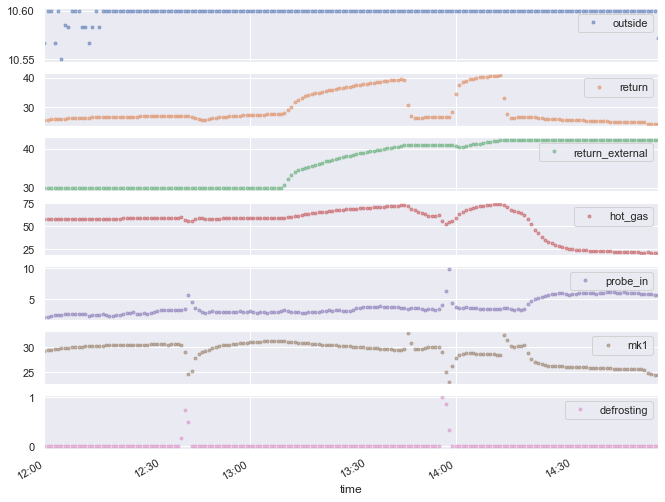

In [19]:
#merged_df.resample('1Min').mean()
display(win)
# todo: How to resample boolean columns to boolean?
win_resampled = win.ffill().resample('1Min').mean()
display(win_resampled)

sns.set(rc={'figure.figsize':(20, 8)})

cols_plot = ['outside', 'return', 'return_external', 'hot_gas', 'probe_in', 'mk1', 'defrosting']
axes = win_resampled[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)


In [5]:
df_night = merged_df[merged_df.index.hour == 22]
print(df_night.groupby(by=[df_night.index.week])['hot_gas'].mean())
print(df_night.groupby(by=[df_night.index.week])['compressor_heating'].sum())



time
1     14.433574
2     15.800000
3     14.075399
4     15.525028
5     17.141829
6     14.537316
7     15.548469
8     15.317804
9     15.924297
10    16.616212
11    16.805267
12    17.097427
13    18.615747
14    19.477051
15    20.537031
16    20.374599
17    20.067411
18    21.521059
19    23.241848
20    22.583965
21    26.299360
22    26.805753
23    25.746602
24    26.052708
25    27.751928
26    28.099902
27    28.113965
28    27.284555
29    28.818042
30    29.028017
31    28.782789
32    27.727880
33    27.712985
34    27.895511
35    27.132382
36    24.837901
37    24.407562
38    23.862086
39    23.326798
40    20.134608
41    21.702313
42    20.926358
43    19.357206
44    18.276557
45    17.362019
46    17.124287
47    17.672892
48    14.656778
49    18.794903
50    17.470110
51    17.442094
52    16.304890
Name: hot_gas, dtype: float64
time
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8     16
9      0
10     0
11    10
12     0
13    18
14    29
15

In [61]:
df_defrosting = merged_df[merged_df['defrosting']==True]
#df_defrosting.groupby(by=[df_defrosting.index.month, df_defrosting.index.year])['defrosting'].sum()
df_defrosting.groupby(by=[df_defrosting.index.month])['hot_gas'].mean()

NotImplementedError: Sparse[float64, nan] dtype not supported

In [21]:
df_plot = merged_df[(merged_df.index > '2020-12-10 12:00:00') & (merged_df.index < '2020-12-10 15:00:00')]

In [16]:
df_plot

,outside,return,reference_return,supply,servicewater_reference,servicewater,return_external,hot_gas,probe_in,mk1,mk1_reference,starts_compressor1,state,extended_state,compressor_heating,defrosting,heatpump_running,heatpump_heating,heatpump_servicewater
time,,,,,,,,,,,,,,,,,,,
2020-12-20 12:00:03,12.4,27.8,39.7,33.0,44.0,40.0,28.6,58.1,10.6,32.2,0.0,3737,Heatpump running: 01:03:26,heating: 01:03:17,False,False,True,True,False
2020-12-20 12:01:23,12.3,27.9,39.7,33.0,44.0,40.0,28.6,58.1,10.7,32.3,0.0,3737,Heatpump running: 01:04:46,heating: 01:04:46,False,False,True,True,False
2020-12-20 12:01:34,12.4,27.9,39.7,33.1,44.0,40.0,28.6,58.1,10.7,32.3,0.0,3737,Heatpump running: 01:04:55,heating: 01:04:55,False,False,True,True,False
2020-12-20 12:04:05,12.3,28.0,39.7,33.2,44.0,40.0,28.6,58.1,10.8,32.4,0.0,3737,Heatpump running: 01:07:26,heating: 01:07:26,False,False,True,True,False
2020-12-20 12:04:15,12.4,28.0,39.7,33.2,44.0,40.0,28.6,58.1,10.7,32.4,0.0,3737,Heatpump running: 01:07:36,heating: 01:07:26,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-20 14:31:45,12.2,39.8,39.7,45.5,44.0,42.0,41.2,71.0,11.3,26.8,0.0,3738,Heatpump running: 00:57:05,service water: 00:57:05,False,False,True,False,True
2020-12-20 14:57:02,12.3,29.0,39.7,34.3,44.0,44.1,43.0,60.6,11.0,33.3,0.0,3738,Heatpump running: 01:22:11,heating: 01:22:11,False,False,True,True,False
2020-12-20 14:57:12,12.2,29.1,39.7,34.3,44.0,44.1,43.0,60.6,11.0,33.4,0.0,3738,Heatpump running: 01:22:21,heating: 01:22:21,False,False,True,True,False


In [61]:
left = pd.DataFrame({"a": [1, 5, 10], "left_val": ["a", "b", "c"]})
left.set_index('a', inplace=True)
display(left)
right = pd.DataFrame({"a": [1, 2, 3, 6, 7], "right_val": [1, 2, 3, 6, 7]})
right.set_index('a', inplace=True)
display(right)
#display(pd.merge_asof(left, right, on="a", allow_exact_matches=False))
dfm = left.merge(right, how='outer', left_index=True, right_index=True, )
dfm
# tolerance = 10)

,left_val
a,
1,a
5,b
10,c


,right_val
a,
1,1
2,2
3,3
6,6
7,7


,right_val
a,
1,1
2,2
3,3
6,6
7,7


In [59]:
rng = pd.date_range("2014-1-1", periods=100, freq="D") + pd.Timedelta("1s")
ts = pd.Series(range(100), index=rng)
ts.resample("3T").sum()
#ts

2014-01-01 00:00:00     0
2014-01-01 00:03:00     0
2014-01-01 00:06:00     0
2014-01-01 00:09:00     0
2014-01-01 00:12:00     0
                       ..
2014-04-09 23:48:00     0
2014-04-09 23:51:00     0
2014-04-09 23:54:00     0
2014-04-09 23:57:00     0
2014-04-10 00:00:00    99
Freq: 3T, Length: 47521, dtype: int64